# 讀取訓練數據

In [1]:
import pandas as pd
from tqdm import tqdm

# 假設資料檔案為 'large_data.csv'
file_path = '38_Training_Data_Set_V2/training.csv'

# 定義分塊大小
chunk_size = 1000 # 每次讀取 10000 條數據
chunks = pd.read_csv(file_path, chunksize=chunk_size)

# 初始化變數來儲存平衡後的數據
balanced_data = []

# 讀取數量
v = 0

for chunk in tqdm(chunks):
    # 計算每個類別的樣本數量
    min_count = chunk['飆股'].value_counts().min()
    
    # 進行平衡：ing
    chunk_balanced = chunk.groupby('飆股').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
    
    # 將平衡後的數據加入列表
    balanced_data.append(chunk_balanced)

    # 若達到限制讀取數量則跳脫
    v += 1
    if v >= 1000:
        break

# 將所有平衡後的數據合併為一個 DataFrame
balanced_data = pd.concat(balanced_data, ignore_index=True)

balanced_data


0it [00:00, ?it/s]C:\Users\TMP-214\AppData\Local\Temp\ipykernel_38764\372332661.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chunk_balanced = chunk.groupby('飆股').apply(lambda x: x.sample(min_count)).reset_index(drop=True)
1it [00:03,  3.51s/it]C:\Users\TMP-214\AppData\Local\Temp\ipykernel_38764\372332661.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chunk_balanced = chunk.groupby('飆股').apply(

,ID,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),...,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度,飆股
0,TR-308,1.2242,2.8303,2.0068,1.3345,0.5329,1.2258,NaN,1.2589,0.5228,...,0.1014,0.4583,0.2233,0.5630,0.2876,0.2664,0.8630,0.4614,0.3086,0
1,TR-400,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,1.5085,1.7588,1.4741,2.1573,0.6713,1.2528,1.3679,1.2500,1.8214,0
2,TR-574,1.2211,-0.3363,1.1138,0.5313,0.6626,1.2243,1.1306,1.2197,0.5756,...,0.5261,0.6934,0.4388,0.3126,0.3364,0.1285,1.6285,0.7393,0.7345,0
3,TR-883,1.2041,-0.0088,-0.0731,0.7112,2.0433,1.2172,0.9935,1.1539,0.9559,...,1.4961,1.9998,1.8015,1.8955,2.4531,2.1200,1.3271,1.1655,1.6206,0
4,TR-844,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,7.0441,3.8219,3.8880,4.9422,3.9780,3.2571,8.0329,6.6016,4.7054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,TR-200347,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,1.3163,1.2619,1.1977,1.1951,0.8964,1.2002,1.2259,0.5957,0.3282,0
2936,TR-200065,1.2266,2.8303,2.0656,1.3963,0.5329,1.2274,1.5139,1.2730,0.9481,...,1.6273,1.2432,0.9314,0.9681,0.9230,1.0359,0.2302,0.8999,0.7001,0
2937,TR-200236,-3.5257,1.0531,0.8662,1.9425,2.2811,0.1487,1.1847,1.2070,1.9726,...,0.9961,0.7341,0.8239,0.6790,0.9518,0.6522,0.9758,0.5494,0.9511,1
2938,TR-200664,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,3.1263,2.5663,2.2776,2.4343,2.6926,2.1756,2.9736,1.7351,1.1069,1


In [2]:
balanced_data['飆股'].value_counts()

飆股
0    1470
1    1470
Name: count, dtype: int64

In [3]:
x_col = balanced_data.drop(['ID','飆股'],axis=1).columns.tolist()
y_col = '飆股'

# 轉換成catboost可接受格式

In [4]:
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    balanced_data[x_col], balanced_data[y_col], 
    test_size=0.2, random_state=42
)

X_test,X_test_final,y_test,y_test_final = train_test_split(
    X_test, y_test, 
    test_size=0.5, random_state=42
)

In [6]:
# 3. 建立 Pool（可選）
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

In [7]:
# 4. 設定模型參數
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    task_type='GPU',        # ✅ 使用 GPU
    devices='0',            # 使用第0張GPU
    verbose=1
)

In [8]:
# 5. 訓練模型
model.fit(train_pool, eval_set=test_pool)

0:	learn: 0.9243061	test: 0.8917197	best: 0.8917197 (0)	total: 263ms	remaining: 26.1s
1:	learn: 0.9371095	test: 0.9125000	best: 0.9125000 (1)	total: 416ms	remaining: 20.4s
2:	learn: 0.9431438	test: 0.9182390	best: 0.9182390 (2)	total: 572ms	remaining: 18.5s
3:	learn: 0.9420168	test: 0.9142857	best: 0.9182390 (2)	total: 727ms	remaining: 17.4s
4:	learn: 0.9452570	test: 0.9240506	best: 0.9240506 (4)	total: 883ms	remaining: 16.8s
5:	learn: 0.9460477	test: 0.9274448	best: 0.9274448 (5)	total: 1.03s	remaining: 16.1s
6:	learn: 0.9468397	test: 0.9245283	best: 0.9274448 (5)	total: 1.25s	remaining: 16.7s
7:	learn: 0.9489540	test: 0.9240506	best: 0.9274448 (5)	total: 1.46s	remaining: 16.7s
8:	learn: 0.9481605	test: 0.9211356	best: 0.9274448 (5)	total: 1.66s	remaining: 16.8s
9:	learn: 0.9502300	test: 0.9177215	best: 0.9274448 (5)	total: 1.86s	remaining: 16.7s
10:	learn: 0.9503132	test: 0.9182390	best: 0.9274448 (5)	total: 2.08s	remaining: 16.9s
11:	learn: 0.9506276	test: 0.9148265	best: 0.9274448 

In [9]:
# 6. 預測與評估
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_final)
f1 = f1_score(y_test_final, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9310


# 預測公開測試集

In [10]:
pub_x = pd.read_csv('38_Public_Test_Set_and_Submmision_Template_V2/38_Public_Test_Set_and_Submmision_Template_V2/public_x.csv')
pub_x

,ID,外資券商_分點進出,外資券商_分點買賣力,外資券商_分點成交力(%),外資券商_分點吃貨比(%),外資券商_分點出貨比(%),外資券商_前1天分點進出,外資券商_前1天分點買賣力,外資券商_前1天分點成交力(%),外資券商_前1天分點吃貨比(%),...,上市加權指數前14天成交量,上市加權指數前15天成交量,上市加權指數前16天成交量,上市加權指數前17天成交量,上市加權指數前18天成交量,上市加權指數前19天成交量,上市加權指數前20天成交量,上市加權指數5天成交量波動度,上市加權指數10天成交量波動度,上市加權指數20天成交量波動度
0,PU-1,1.2219,NaN,1.2413,0.5313,0.5329,1.2258,NaN,1.2238,0.5228,...,0.3492,0.1014,0.4583,0.2233,0.5630,0.2876,0.2664,0.8630,0.4614,0.3086
1,PU-2,1.2219,NaN,1.2413,0.5313,0.5329,1.2243,1.2072,1.2238,0.5228,...,1.8991,2.3784,1.9220,2.3146,3.4425,2.8982,2.8924,1.6241,2.2758,1.8835
2,PU-3,3.2984,1.4356,1.8457,3.5096,2.8033,-2.3714,1.2767,1.3264,2.3178,...,0.6375,0.4582,0.8285,0.7927,1.4526,1.2864,1.1145,0.5992,2.3232,2.0103
3,PU-4,1.2211,-0.3363,0.7311,0.5313,1.0516,1.2258,NaN,1.2104,0.5228,...,0.5781,0.9577,0.6808,0.5511,0.1747,0.0290,0.1628,0.8125,0.7227,0.5577
4,PU-5,1.5689,1.5861,1.8969,2.4814,1.7553,1.0782,1.3010,1.2881,1.7097,...,1.0682,1.0271,0.9876,1.7390,1.3109,1.6806,1.3216,4.1865,2.7835,1.7238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25103,PU-25104,1.2219,NaN,1.2413,0.5313,0.5329,1.2250,1.2072,1.2238,0.5228,...,3.0928,2.4741,2.2177,2.4033,2.0818,2.5835,2.3398,1.3057,0.8594,1.4832
25104,PU-25105,1.3073,1.2751,1.3396,3.4861,3.2950,-0.0939,1.2131,1.2345,3.0997,...,3.3519,2.5249,2.8949,2.3010,2.3636,2.7702,2.3189,2.0434,1.9664,1.8610
25105,PU-25106,1.2041,-0.3363,0.3484,0.5313,1.4406,1.1811,1.0835,1.1827,0.5228,...,0.6593,0.9105,0.7159,0.6506,0.8340,1.0138,1.2428,0.3604,-0.2059,0.2469
25106,PU-25107,1.0892,0.6864,0.8777,0.8795,1.2398,1.4488,1.1700,1.2118,1.2927,...,1.0392,1.3660,1.2182,1.3742,1.0321,1.3339,1.9647,0.8373,0.9554,0.7367


In [11]:
y_pred = model.predict(pub_x[x_col])
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
pd.Series(y_pred).value_counts()

0    22601
1     2507
Name: count, dtype: int64

In [13]:
submit = pd.read_csv('38_Public_Test_Set_and_Submmision_Template_V2/38_Public_Test_Set_and_Submmision_Template_V2/submission_template_public.csv')
submit['飆股'] = y_pred
submit.to_csv('submit.csv',index=False)

# 特徵重要度

1. 技術指標_月RSI(10): 14.5717
2. 技術指標_週RSI(10): 7.3746
3. 技術指標_季K(9): 6.1581
4. 個股19天乖離率: 4.3143
5. 技術指標_乖離率(250日): 3.8760
6. 技術指標_月ADX(14): 3.5919
7. 技術指標_RSI(10): 3.5903
8. 技術指標_週RSI(5): 3.4584
9. 技術指標_季D(9): 3.2622
10. 技術指標_月RSI(5): 2.4422


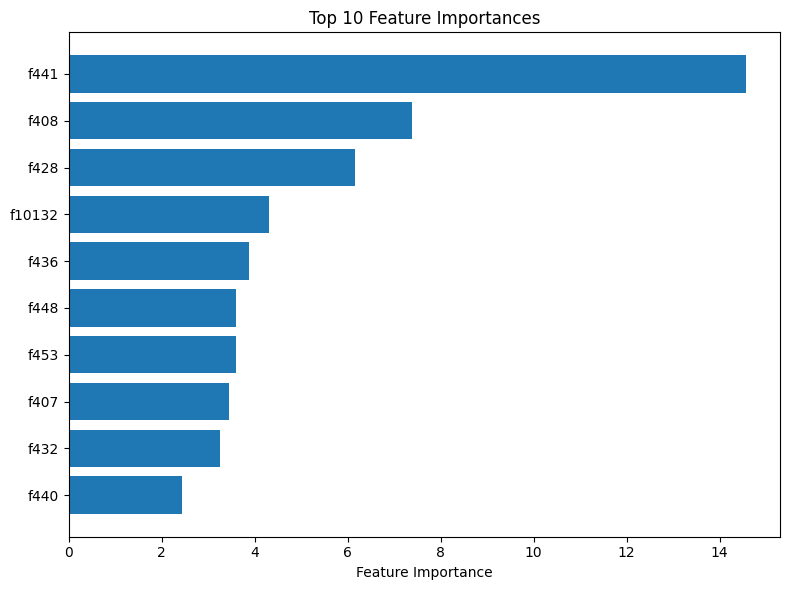

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 取得特徵重要度
importances = model.get_feature_importance()

# 假設你沒有 feature names，就用預設 f0, f1, f2...
feature_names = [f"f{i}" for i in range(len(importances))]

# 取得前10名的重要度與名稱
top_n = 10
indices = np.argsort(importances)[::-1][:top_n]  # 由大到小排序
top_features = [feature_names[i] for i in indices]
top_importances = importances[indices]

# 顯示數值
for i, (name, score) in enumerate(zip(top_features, top_importances)):
    print(f"{i+1}. {x_col[int(name[1:])]}: {score:.4f}")

# 繪圖
plt.figure(figsize=(8, 6))
plt.barh(range(top_n), top_importances[::-1], align='center')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()


In [15]:
new_x_col = []
for i, (name, score) in enumerate(zip(top_features, top_importances)):
    new_x_col.append(x_col[int(name[1:])])
new_x_col

['技術指標_月RSI(10)',
 '技術指標_週RSI(10)',
 '技術指標_季K(9)',
 '個股19天乖離率',
 '技術指標_乖離率(250日)',
 '技術指標_月ADX(14)',
 '技術指標_RSI(10)',
 '技術指標_週RSI(5)',
 '技術指標_季D(9)',
 '技術指標_月RSI(5)']

In [16]:
balanced_data[['ID'] + new_x_col + ['飆股']].to_csv('balanced_data_with_top10_features.csv')

In [17]:
balanced_data[['ID'] + new_x_col + ['飆股']]

,ID,技術指標_月RSI(10),技術指標_週RSI(10),技術指標_季K(9),個股19天乖離率,技術指標_乖離率(250日),技術指標_月ADX(14),技術指標_RSI(10),技術指標_週RSI(5),技術指標_季D(9),技術指標_月RSI(5),飆股
0,TR-308,1.0931,0.6871,0.9497,1.0544,0.8758,1.7917,0.7455,0.6948,0.5873,0.6745,0
1,TR-400,0.4105,-0.2666,1.5399,0.0404,-0.0607,1.1313,-0.3500,-0.1899,1.4822,-0.0403,0
2,TR-574,3.2680,1.6904,2.1101,0.7824,3.1469,1.3064,0.4456,0.8787,1.1308,2.8425,0
3,TR-883,0.9944,0.3236,0.6096,0.7818,0.5387,1.3211,0.3334,-0.1814,0.3075,0.5026,0
4,TR-844,0.9596,0.3954,-0.2092,-1.2850,0.1896,1.5892,-0.0780,0.1677,-0.4732,0.7577,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2935,TR-200347,1.2779,0.2577,1.1673,0.4024,0.7229,1.0937,0.3048,0.1267,1.6073,0.4037,0
2936,TR-200065,0.8609,1.2987,0.0296,0.6065,1.0076,1.6293,0.7858,1.1639,-0.1167,0.9814,0
2937,TR-200236,2.4547,2.7648,2.4875,2.8174,2.0052,0.8110,3.1557,2.9318,1.8793,2.6178,1
2938,TR-200664,2.7256,3.1906,2.9809,4.4886,2.4447,2.6579,2.6234,3.2644,3.1256,2.2688,1
